#### Import Pandas, Matplotlib.pyplot, and Seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
#### Pull in data from website with pandas and convert to a dataframe with Tidy Data
Statistics Site: https://www.zippia.com/user-experience-designer-jobs/demographics/

**NOTE!  If site changes, data will change!!**

https://pandas.pydata.org/docs/reference/api/pandas.read_html.html

https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [2]:
# read the html data
ux_data_raw = pd.read_html('https://www.zippia.com/user-experience-designer-jobs/demographics/')
ux_dataframe = ux_data_raw[1]

# pivot and clean the data into tidy data standards using 'pandas melt()'
ux_data = pd.melt(
    ux_dataframe, # dataframe being pivoted
    id_vars='Year',  # column to be used as main observation variable
    value_vars=['Male', 'Female'], # column(s) to be pivioted out
    var_name='Gender', # name of new pivoted column
    value_name='Percent', # name of new value column
)

# remove the percent character (%) and convert the percent column to floats
ux_data['Percent'] = ux_data['Percent'].str.rstrip('%').astype('float')

# set the proper data types
ux_data = ux_data.astype({
    'Year': 'category',
    'Gender': 'category'
})

#### Group the data by year and gender

In [3]:
# group the data by year and gender
yg_group = ux_data.groupby(['Year', 'Gender'])

---
### Helper Function
We re-use the methods to name the axes, add a legend and show the figure so to save code we create a helper.  
Also include seaborn styling (which will affect both seaborn and matplotlib figures)

color codes: https://matplotlib.org/stable/tutorials/colors/colors.html

In [4]:
def label_and_show(fig, type = 'matplotlib'):
    if type == 'seaborn':
        # if seaborn figure, set theme, remove border, and use default legend setup
        sns.set_style("ticks") # 'white', 'dark', 'whitegrid', 'darkgrid', 'ticks'
        sns.despine()
    else:
        # if matplotlib figure, setup legend and use default theming
        fig.legend(['Female','Male'], loc='lower right')
    
    # set x- and y-axis labels + figure title  (both figure types)
    fig.set(xlabel='% Gender', ylabel='Year', title='UX Designer Gender by Year')

    # display figure
    plt.show()

---
# Matplotlib (Refresher)

### Create the Matplotlib version (Histogram / Stacked Bar Chart)
https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

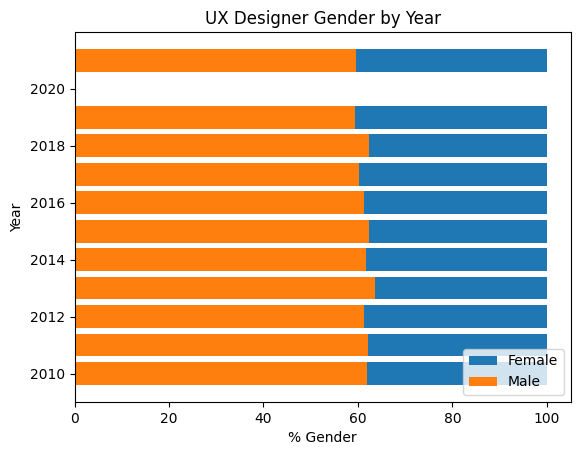

In [5]:
# create a new 
fig_1, ax_1 = plt.subplots()

# loop through the grouped data
for idx, o in yg_group:
    if o.Gender.item() == 'Male':
        # if male gender, display as orange and label as male
        ax_1.barh(o.Year, o.Percent, left=0, label='Male', color="tab:orange")
    else:
        # if female gender, calculate its starting point on the bar
        start_loc = 100 - o.Percent
        # start at the calculated offset, display as blue and label as female
        ax_1.barh(o.Year, o.Percent, left=start_loc, label='Female', color="tab:blue")

# add labels and title
label_and_show(ax_1)

### Create the Matplotlib version (Horizontal Stacked / Grouped Bar Chart)
https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

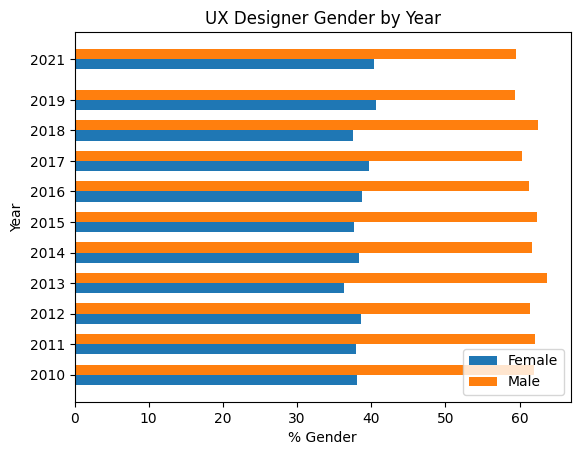

In [6]:
# create a new figure
fig_1, ax_1 = plt.subplots()

# matplotlib doesnt seem to have a graceful way to stack bars so we need to add an offset
offset = 0

# loop through the grouped data
for idx, o in yg_group:
    if o.Gender.item() == 'Male':
        # if the observation is 'male', label it as male and set the color to orange
        ax_1.barh(int(o.Year) + offset, o.Percent, 1, label='Male', color='tab:orange')
    else:
        # otherwise, label it as female and set the color to blue
        ax_1.barh(int(o.Year) + offset, o.Percent, 1, label='Female', color='tab:blue')
    offset += 1

# set the y ticks in the proper locations with the proper values
ax_1.set_yticks(
    [2010.5, 2013.5, 2016.5, 2019.5, 2022.5, 2025.5, 2028.5, 2031.5, 2034.5, 2037.5, 2041.5],
    ux_data['Year'].mode()
)

# add labels and title
label_and_show(ax_1, 'matplotlib')

---
# Seaborn

### Create the Seaborn Version (Histogram / Stacked Bar Chart)
https://seaborn.pydata.org/generated/seaborn.histplot.html

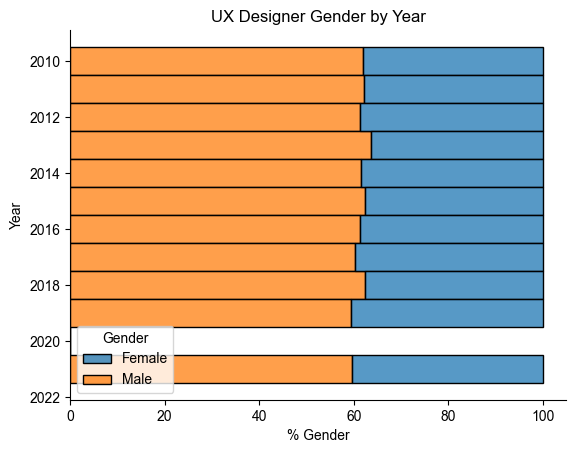

In [7]:
# create a matplotlib figure
fig_3, ax_3 = plt.subplots()

# map the values with a histplot
sns.histplot(ux_data, y='Year', hue='Gender', weights='Percent', multiple='stack')

# add labels and title
label_and_show(ax_3, 'seaborn')

### Create the Seaborn Version (Horizontal Stacked / Grouped Bar Chart)
https://seaborn.pydata.org/generated/seaborn.barplot.html

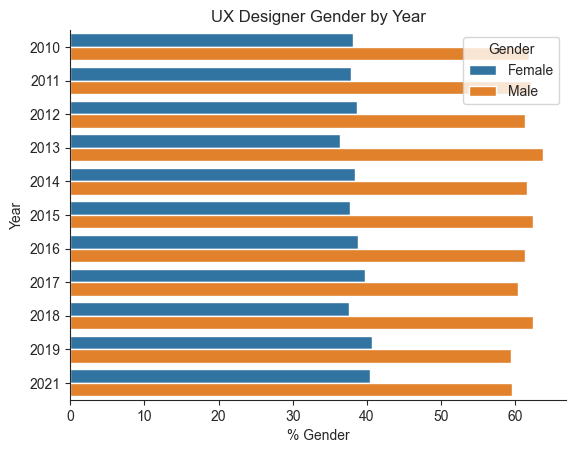

In [8]:
# Create a new figure
fig_4, ax_4 = plt.subplots()

# Using the seaborn barplot method, plot year and percent with a "hue" separator variant
sns.barplot(y='Year', x='Percent', hue='Gender', data=ux_data, orient='h')

# add labels and title
label_and_show(ax_4, 'seaborn')

---
## Bonus
Discovered after the fact... Seaborn has a bunch of data examples to tap into for practice with the method `seaborn.load_dataset()`

https://github.com/mwaskom/seaborn-data

In [9]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
